In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('Churn_Modelling.csv')
# df.columns
# df.head()

In [2]:

#input data
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
     'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
#output data
y = df['Exited']
# x
# sns.countplot(x=y)
# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# x_scaled
# Cross Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25)

# model building
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100),max_iter=100, activation = 'relu',random_state=0)
ann.fit(x_train, y_train)
y_pred = ann.predict(x_test)
# y_pred

C:\Users\Soham\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
#checking accuracy
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
accuracy_score(y_test, y_pred)
# print(classification_report(y_test, y_pred))

0.8699146157709694

In [4]:
# here we can see that recall value for 1 is 0.46 which means model fails 50 % of the time 
# it is due to the fact that the data in the dataset is imbalanced ( 80 percent is 0 and 20 percent is 1)
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
#here we can see 1 has ~2000 entries so we have 2 options random oversampling or random undersampling
# in over sampling we randomly repeat the entries in the one where less entries are present
# in under sampling we reduce the number of entries in the one to match the lower one
# in order to prevent loss of data we generally tend top prefer over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state =0)
x_res, y_res = ros.fit_resample(x, y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

C:\Users\Soham\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


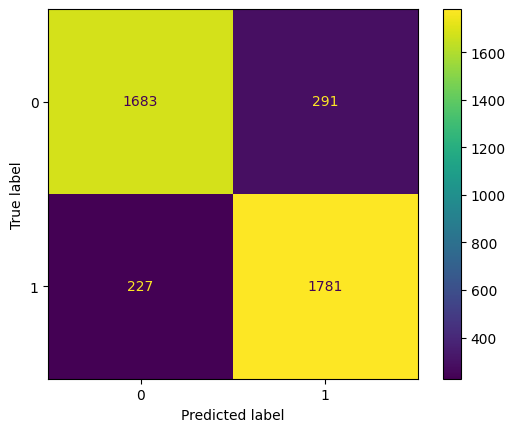

In [6]:
# Normalize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)
# x_scaled
# Cross Validation
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, test_size = 0.25)
ann = MLPClassifier(hidden_layer_sizes=(100, 100, 100),max_iter=100, activation = 'relu')
ann.fit(x_train, y_train)
y_pred = ann.predict(x_test)
y_pred
#checking accuracy
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [7]:
# print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

0.8699146157709694